In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_value'].max()
Min = Mexico['review_scores_value'].min()
Limites = [Min, Max]
Limites

[3.69, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.31

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.08349463407713228

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.69, 5.0, 16)
intervalos

array([3.69      , 3.77733333, 3.86466667, 3.952     , 4.03933333,
       4.12666667, 4.214     , 4.30133333, 4.38866667, 4.476     ,
       4.56333333, 4.65066667, 4.738     , 4.82533333, 4.91266667,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Insuficiente",
    "Deficiente",
    "Mejorable",
    "Bajo",
    "Aceptable",
    "Bueno",
    "Muy bueno",
    "Sobresaliente",
    "Excepcional",
    "Excelente",
    "Impresionante",
    "Increíble",
    "Espectacular",
    "Fantástico",
    "Adecuado"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_value'] = pd.cut ( x = Mexico ['review_scores_value'], bins = intervalos, labels = categorias )
Mexico['review_scores_value']

0        Espectacular
1           Excelente
2          Fantástico
3            Adecuado
4        Espectacular
             ...     
26577    Espectacular
26578    Espectacular
26579    Espectacular
26580    Espectacular
26581    Espectacular
Name: review_scores_value, Length: 26582, dtype: category
Categories (15, object): ['Insuficiente' < 'Deficiente' < 'Mejorable' < 'Bajo' ... 'Increíble' < 'Espectacular' < 'Fantástico' < 'Adecuado']

In [12]:
table1 = freq_tbl(Mexico['review_scores_value'])
table1

,review_scores_value,frequency,percentage,cumulative_perc
0,Espectacular,8296,0.312091,0.312103
1,Adecuado,6129,0.230570,0.542681
2,Fantástico,4602,0.173125,0.715812
3,Increíble,2602,0.097886,0.813702
4,Impresionante,1643,0.061809,0.875513
5,Excelente,1191,0.044805,0.920319
6,Excepcional,567,0.021330,0.941650
7,Bajo,509,0.019148,0.960799
8,Sobresaliente,409,0.015386,0.976186
9,Muy bueno,273,0.010270,0.986456


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_value,frequency
0,Espectacular,8296
1,Adecuado,6129
2,Fantástico,4602
3,Increíble,2602
4,Impresionante,1643
5,Excelente,1191
6,Excepcional,567
7,Bajo,509
8,Sobresaliente,409
9,Muy bueno,273


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_value')
Filtro_index

,frequency
review_scores_value,
Espectacular,8296
Adecuado,6129
Fantástico,4602
Increíble,2602
Impresionante,1643
Excelente,1191
Excepcional,567
Bajo,509
Sobresaliente,409


Text(0, 0.5, 'Frecuencia')

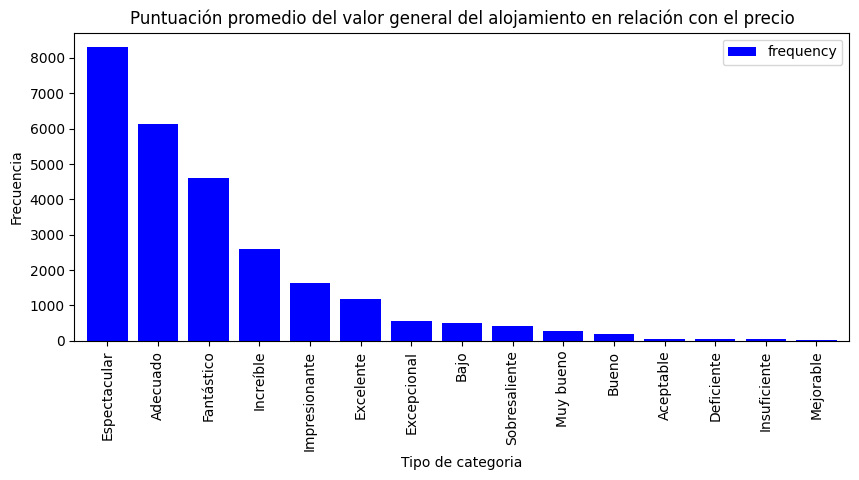

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio del valor general del alojamiento en relación con el precio')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')